In [29]:
# Import ing Modules

from kaggle.api.kaggle_api_extended import KaggleApi
from zipfile import ZipFile
from tqdm import tqdm
import os 
import shutil
from glob import glob
from PIL import Image
import random 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Initiating the Kaggle API
api = KaggleApi()

# Authenticating the Kaggle API
api.authenticate()

In [7]:
# Downloading the dataser
api.dataset_download_files('defileroff/comic-faces-paired-synthetic', quiet=False)

  0%|          | 1.00M/662M [00:00<01:12, 9.50MB/s]

100%|██████████| 662M/662M [00:28<00:00, 24.0MB/s] 

In [8]:
file_name = 'comic-faces-paired-synthetic.zip'

with ZipFile(file=file_name) as zip_file:
    for file in tqdm(iterable=zip_file.namelist(), total=len(zip_file.namelist())):
        zip_file.extract(member=file, path= '../data')

print("#######Deleting Zip File #####")
os.remove(file_name)

100%|██████████| 20003/20003 [00:05<00:00, 3636.47it/s]

#######Deleting Zip File #####


In [17]:

shutil.move('../data/face2comics_v1.0.0_by_Sxela/face2comics_v1.0.0_by_Sxela/comics', '../data/comics')
shutil.move('../data/face2comics_v1.0.0_by_Sxela/face2comics_v1.0.0_by_Sxela/face', '../data/face')

shutil.rmtree('../data/samples')
shutil.rmtree('../data/face2comics_v1.0.0_by_Sxela')

          

In [20]:
comicfiles = glob('../data/comics/*')
facefiles = glob('../data/face/*')

print("Comics Images Count :: {}".format(len(comicfiles)))
print("Face Images Count :: {}".format(len(facefiles)))

Comics Images Count :: 10000
Face Images Count :: 10000


Text(0.5, 1.0, 'Comic Face')

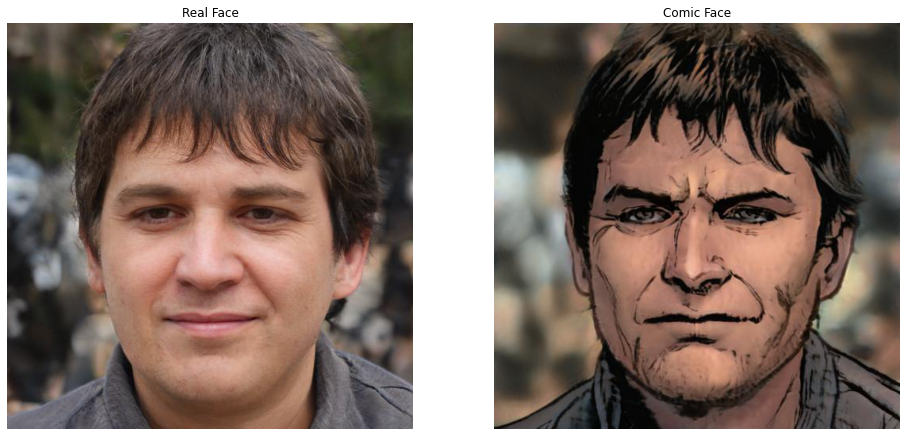

In [50]:
# Open Random Imgages
face_sample = random.choice(facefiles)
comic_sample = face_sample.replace('face', 'comics') 

face_image = Image.open(face_sample)
comic_image = Image.open(comic_sample)

# create figure
fig = plt.figure(figsize=(16, 9))
  
rows = 1
columns = 2

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(face_image)
plt.axis('off')
plt.title("Real Face")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(comic_image)
plt.axis('off')
plt.title("Comic Face")


In [41]:
print('face Image Dimensions :: ', np.array(face_image).shape)
print('comic Image Dimensions :: ', np.array(comic_image).shape)


face Image Dimensions ::  (512, 512, 3)
comic Image Dimensions ::  (512, 512, 3)
